In [ ]:
!pip install scikit-learn==1.1.1 -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

iris.data

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
    iris.data, iris.target, random_state=0) 
 
mlp = MLPClassifier() 
mlp.fit(X_train, y_train) 
 
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.82


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"alpha": [0.1, 0.01, 0.0001],
          "hidden_layer_sizes": [(10,10,10),
                                 (100,100,100),
                                 (100,100)],
          "solver" : ["adam"],
          "activation": ["relu"]}

mlpc_cv_model = GridSearchCV(mlp, params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    iris.data, iris.target, random_state=0) 
 
mlp = MLPClassifier() 

mlpc_cv_model.fit(X_train, y_train)

print("Правильность на тестовом наборе: {}".format(mlpc_cv_model.score(X_test, y_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Правильность на тестовом наборе: 0.9736842105263158


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Наилучшее значение параметров: {}".format(mlpc_cv_model.best_params_))
print("Наилучшее значение кросс-валидачии правильности: {:.2f}".format(mlpc_cv_model.best_score_))

Наилучшее значение параметров: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
Наилучшее значение кросс-валидачии правильности: 0.98


In [ ]:
print("Наилучшая модель {}".format(mlpc_cv_model.best_estimator_))

Наилучшая модель MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100))


In [ ]:
results2 = pd.DataFrame(mlpc_cv_model.cv_results_)
display(results2)

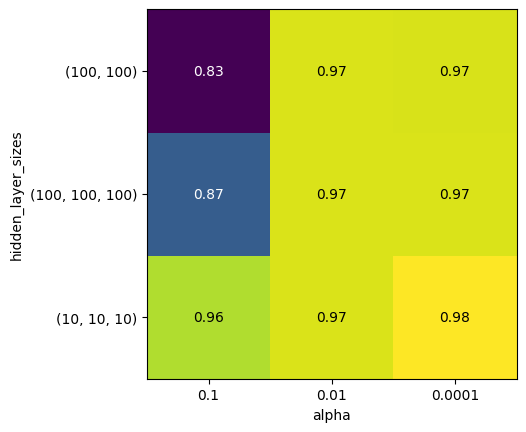

In [ ]:
scores = np.array(results2.mean_test_score).reshape(3, 3)


mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=params['alpha'], 
                      ylabel='hidden_layer_sizes', yticklabels=params['hidden_layer_sizes'], cmap="viridis")

In [72]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

params = {"alpha": [1, 0.5, 0.1, 0.01, 0.005, 0.001],
          "hidden_layer_sizes": [(20,),
                                 (22,),
                                 (24,),
                                 (26,),
                                 (28, ),
                                (30, )
                                 ],
          "solver" : ["adam"],
          "activation": ["tanh"]}

mlpc_cv_model = GridSearchCV(mlp, params, 
                         cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0), 
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2, scoring='roc_auc')

In [74]:
X_train, X_test, y_train, y_test = train_test_split( 
    iris.data, iris.target, random_state=0) 
 
mlp = MLPClassifier(max_iter=200) 

mlpc_cv_model.fit(X_train, y_train)

Fitting 100 folds for each of 36 candidates, totalling 3600 fits


KeyboardInterrupt: ignored

In [69]:
results3 = pd.DataFrame(mlpc_cv_model.cv_results_)
display(results3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.621033,0.240270,0.005351,0.004712,tanh,1,"(20,)",adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
1,1.235259,0.253519,0.004546,0.004349,tanh,1,"(22,)",adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
2,2.089671,0.667952,0.002829,0.002205,tanh,1,"(24,)",adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
3,1.189386,0.475210,0.004572,0.003836,tanh,1,"(26,)",adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
4,0.682800,0.045804,0.002488,0.001754,tanh,1,"(28,)",adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
5,0.627103,0.051663,0.002169,0.001541,tanh,1,"(30,)",adam,"{'activation': 'tanh', 'alpha': 1, 'hidden_lay...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
6,0.632898,0.041266,0.001810,0.001193,tanh,0.5,"(20,)",adam,"{'activation': 'tanh', 'alpha': 0.5, 'hidden_l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
7,0.649965,0.061124,0.002285,0.001733,tanh,0.5,"(22,)",adam,"{'activation': 'tanh', 'alpha': 0.5, 'hidden_l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
8,0.644096,0.034983,0.002023,0.001734,tanh,0.5,"(24,)",adam,"{'activation': 'tanh', 'alpha': 0.5, 'hidden_l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648
9,0.994390,0.342815,0.002977,0.002415,tanh,0.5,"(26,)",adam,"{'activation': 'tanh', 'alpha': 0.5, 'hidden_l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648


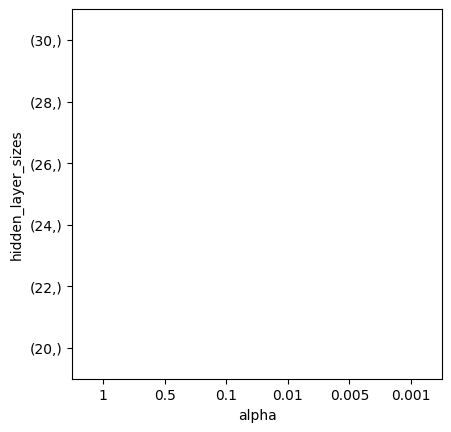

In [70]:
scores = np.array(results3.mean_test_score).reshape(6, 6)


mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=params['alpha'], 
                      ylabel='hidden_layer_sizes', yticklabels=params['hidden_layer_sizes'], cmap="viridis")